<a href="https://colab.research.google.com/github/matelazar07/DUE-FSharp/blob/master/HW1_Image_Colorization_24_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 1 - Image Colorization**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Homeworks</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://learnopencv.com/wp-content/uploads/2018/07/colorization-example.png" alt="1" border="0">

This notebook contains the required task for the **first homework** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.

# **Task Description**

`Image Colorization` is the process of converting a grayscale image (single-channel) into an image with a specific color spectrum. In this homework, your task is to **create and train a convolutional neural network (CNN) model** to colorize grayscale images to the RGB color spectrum. To demonstrate the effectiveness of CNNs, you will also implement a **linear regression model** for the same task and compare their results.

## **Expectations**

- The **performance does not need to be perfect**, but your **metrics should show better results than random color guessing**, and the **loss should decrease throughout the epochs**.
- You are **free to design any custom shallow convolutional neural network**, as long as it is specifically tailored for the image colorization task.
- You can choose **any dataset** (e.g., `CIFAR-10`, `Caltech101`, `Food101`, `FlickR`) or create a custom dataset by **scraping the web** for a specific theme. If you decide to use web scraping, you can utilize the `icrawler` Python package. Ensure that **no NSFW images** are included.
- If you decide to use a **high-resolution dataset**, apply **resizizing transformations** since the fully connected network’s complexity increases with input size. For example:
  - A $[1\times32\times32]$ grayscale image will have $1,024$ features.
  - A $[1\times512\times512]$ grayscale image will have $262,144$ features, which is $256$ **times more**.
  
## **Requirements**

- Data Visualization:
  - Display **samples from the original dataset**.
  - Show the **transformed grayscale images** at the beginning of the notebook.
  - Present **predicted colorized images** alongside ground truth images.

- Performance Monitoring:
  - **Visualize training and validation losses** after training the network.
  - **Use plots and metrics (e.g., matplotlib, seaborn)** to display performance trends.

- Implement **overfitting prevention techniques**, such as:
  - **Early stopping**
  - **Regularization techniques**
  - **Experimenting with different loss functions**
  - Save the **best-performing model** during training.

- Compare model performance:
  - **Visualize predictions** on a batch of test images.
  - Calculate and display **batch losses for both FCN and CNN models**.
  - Explain why the models perform as they do, **highlighting the strengths and weaknesses** of each approach.

- Visualizing:
  - **Feature Maps** of the CNN model
  - **Weights** of the FCN model

- Optionally, use **WandB (Weights and Biases)** or **TensorBoard** to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.

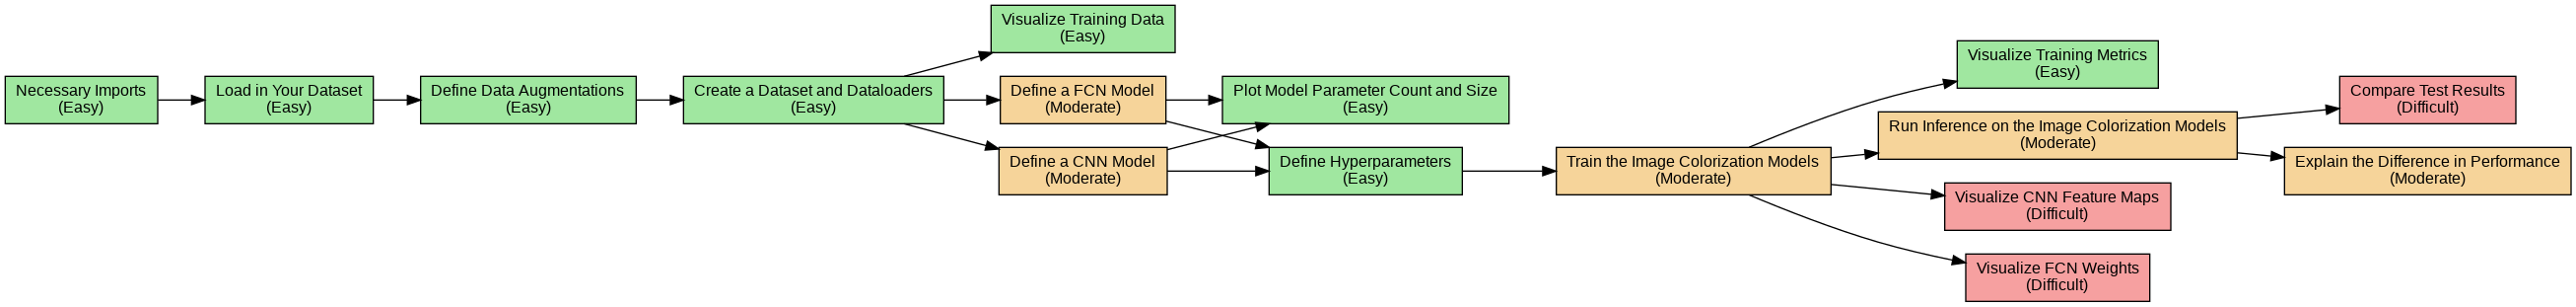

In [ ]:
# @title Image Colorization Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LoadData', 'Load in Your Dataset\n(Easy)', fillcolor='#A0E7A0')
    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Easy)', fillcolor='#A0E7A0')
    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')
    dot.node('CreateCNN', 'Define a CNN Model\n(Moderate)', fillcolor='#F6D49A')
    dot.node('CreateFCN', 'Define a FCN Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TorchSummary', 'Plot Model Parameter Count and Size\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Hyperparameters', 'Define Hyperparameters\n(Easy)', fillcolor='#A0E7A0')

    dot.node('TrainModel', 'Train the Image Colorization Models\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')

    dot.node('RunInference', 'Run Inference on the Image Colorization Models\n(Moderate)', fillcolor='#F6D49A')

    dot.node('CompareResults', 'Compare Test Results\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('ExplainResults', 'Explain the Difference in Performance\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeFM', 'Visualize CNN Feature Maps\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('VisualizeW', 'Visualize FCN Weights\n(Difficult)', fillcolor='#F6A0A0')

    # Edges
    dot.edge('Imports', 'LoadData')
    dot.edge('LoadData', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')
    dot.edge('DatasetDataloader', 'CreateCNN')
    dot.edge('DatasetDataloader', 'VisualizeSample')
    dot.edge('DatasetDataloader', 'CreateFCN')

    dot.edge('CreateCNN', 'TorchSummary')
    dot.edge('CreateFCN', 'TorchSummary')
    dot.edge('CreateCNN', 'Hyperparameters')

    dot.edge('CreateFCN', 'Hyperparameters')
    dot.edge('Hyperparameters', 'TrainModel')

    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'RunInference')
    dot.edge('TrainModel', 'VisualizeFM')
    dot.edge('TrainModel', 'VisualizeW')
    dot.edge('RunInference', 'CompareResults')
    dot.edge('RunInference', 'ExplainResults')

    dot.render(output_filename, view=False)

create_flowchart('homework1_flowchart')
IMG('homework1_flowchart.png')

Each section of the Notebook will guide you through the task:
- `necessary imports`
- `data loading process`
- `defining data augmentations`
- `creating a dataset and dataloaders`
- `visualizing the training data`
- `creating a CNN model`
- `creating a FCN model`
- `defining a loss function and an optimizer`
- `creating a training and validation loop`
- `testing the models`
- `comparing results`
- `visualizing weights and feature maps`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- **No NSFW, inappropriate, offensive, or negative images**. Be creative or use your hobbies as inspiration.
- The model is **not expected to achieve high performance** but must perform better than random color guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is October 21st Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:**

**Neptun ID:**

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## **1. Data Loading Process**

If you're unsure which dataset to use, **PyTorch** provides a collection of **pre-built datasets** in its [documentation](https://pytorch.org/vision/main/datasets.html). Look for a dataset under the *Image Classification* section that contains colored images.

**Caltech-101:**

<img src=" https://datasets.activeloop.ai/wp-content/uploads/2022/09/Caltech-101-dataset-main-image.webp" alt="1" border="0">

**CIFAR-10:**

<img src=" https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-10-dataset-Activeloop-Platform-visualization-image-1.webp" alt="1" border="0">

**Food-101:**

<img src=" https://storage.googleapis.com/kaggle-datasets-images/2918922/5029790/277a9147ec4854e4762767c8bd107bec/dataset-card.png?t=2023-02-20-08-37-14" alt="1" border="0">




## **2. Defining Augmentations**

Since most datasets and images are in RGB color space, you'll need to convert them to grayscale. However, we **strongly recommend** against applying the grayscale transformation immediately after loading the dataset, as this would result in losing the original colored images (which serve as the target). Instead, apply essential preprocessing steps like `tensor conversion`, `normalization` and `resizing` first, and **only perform the grayscale transformation within the custom Dataset class** to retain access to both input (grayscale) and target (RGB) images.

```python
train_transforms = transforms.Compose([
            # Add Augmentations
])

test_transforms = transforms.Compose([
            # Add Augmentations
])
```

In [ ]:
# ADD YOUR CODE HERE

## **3. Creating Datasets and Dataloaders**

To train a custom object detection model, a dataset is required. For this assignment, you will create a **custom dataset class** that takes a dataset path as input and returns **input-output** image pairs when batched through a `Dataloader`:

- **Input:** $[1\times H \times W]$ grayscale image  
- **Output:** $[3\times H \times W]$ RGB image  

Use the built-in **`transforms.Grayscale`** method from `torchvision.transforms` to convert images to grayscale.

> **Note:** The $W$ and $H$ dimensions do not necessarily have to be the same.

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

```python
class GrayscaleToColorDataset(Dataset):
    def __init__(self):
        raise NotImplementedError
    
    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, idx):
        raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **4.1 Visualize Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input-output** pairs using `Matplotlib` or `Seaborn`. Ensure that at least **8 pairs** are displayed for a clear representation.

```python
def visualize_batch():
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **4.2 Creating a CNN Model**

You are free to design your CNN using any combination of:
- `Conv2d` layers
- `MaxPool2d`
- Normalization techniques (e.g., `BatchNorm`, `Dropout`)
- Activation functions (e.g., `ReLU`, `LeakyReLU`, etc.)

The final convolutional layer should output a tensor of shape $[3 × H × W]$ to match the RGB color space. Apply a `sigmoid` activation at the end to constrain the output values between **0 and 1**, allowing for later **denormalization** to the full RGB scale.

For an **extra grade improvement**, explore more advanced architectures and techniques:

- **Dilation in Conv2D layers:** Expands the receptive field without increasing parameters.  
  [PyTorch Docs on Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  

- **Transpose Convolutions:** Used for upsampling to restore spatial dimensions in an image.  
  [PyTorch Docs on ConvTranspose2d](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html)  

- **Encoder-Decoder Models & UNets:** Popular in segmentation and image-to-image translation tasks.  
  [Understanding UNet](https://towardsdatascience.com/understanding-u-net-61276b10f360/)  

- **Generative Adversarial Networks (GANs):** Used for high-quality image generation and colorization.  
  [Introduction to GANs](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)  

```python
class ColorizationCNN(nn.Module):
    def __init__(self):
        super(ColorizationCNN, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **4.3 Creating a FCN Model**

The fully connected network should process an **input grayscale image** and transform it into an RGB image by following these steps:

1. **Flatten the input:**  
   - Convert the image into a vector of shape $[N, 1 * H * W]$, where $N$ is the batch size.
   
2. **Linear Projection:**  
   - Apply a **fully connected (linear) layer** that projects the input vector to a space of $[N, 3 * H * W]$.

3. **Reshape the output:**  
   - Reshape the result back into an image format with shape $[N, 3, H, W]$, matching the expected RGB output.

Feel free to add **more hidden layers** and incorporate **non-linear activation functions**, normalization techniques, and other enhancements to help the model learn more expressive and complex features.

```python
class ColorizationLinear(nn.Module):
    def __init__(self):
        super(ColorizationLinear, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **5.1 Plotting Model Parameter Count and Size**

A convenient way to inspect the number of parameters in a defined `nn.Module` is by using the `torchsummary` package. This package provides a detailed summary of the model architecture, including the number of parameters in each layer, their shapes, and the total parameter count.

To use `torchsummary`, you need to pass a dummy tensor with the specified input shape. The package will then traverse the model, layer by layer, calculating the total number of trainable and non-trainable parameters while also displaying the output shapes at each stage.

Sumnmarize **both models**!

```python
model_cnn = ColorizationCNN().to(device)
summary(model_cnn, input_size = )
```

In [ ]:
# ADD YOUR CODE HERE

In [ ]:
# ADD YOUR CODE HERE

## **5.2 Defining Loss Function and Optimizer**

**Loss Functions and their options:**

For our grayscale-to-color image translation task, we are performing **regression** rather than classification. Our network predicts continuous RGB values for each pixel, meaning that the chosen loss function should effectively measure the difference between the predicted and true color values.

---

### **a. Mean Squared Error (MSE) Loss**
MSE loss is a standard choice for regression tasks as it penalizes larger errors more strongly than smaller ones. It is computed as:

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where $ y_i $ is the ground truth pixel value and $ \hat{y}_i $ is the predicted pixel value.

- **Pros:** Simple, commonly used for regression, computationally efficient.
- **Cons:** Sensitive to outliers since it squares errors.

---

### **b. Root Mean Squared Error (RMSE) Loss**
RMSE is simply the square root of MSE, reducing the impact of squared errors and providing a more interpretable loss value in the same unit as the output.

$$
\mathcal{L}_{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
$$

- **Pros:** Less sensitive to large errors compared to MSE, more interpretable.
- **Cons:** Still punishes large errors significantly.

---

### **c. Huber Loss**
Huber Loss is a combination of MSE and Mean Absolute Error (MAE) that is more robust to outliers. It applies MSE for small errors and MAE for large ones:

$$
\mathcal{L}_{Huber} =
\begin{cases}
\frac{1}{2} (y_i - \hat{y}_i)^2, & \text{if} \ |y_i - \hat{y}_i| \leq \delta \\
\delta (|y_i - \hat{y}_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$$

where $ \delta $ is a threshold defining the transition from quadratic to linear loss.

- **Pros:** Robust to outliers while still penalizing significant errors.
- **Cons:** Introduces an extra hyperparameter $ \delta $ that must be tuned.

---

### **d. Structural Similarity Index (SSIM) Loss (Advanced)**
While MSE and Huber loss work on a per-pixel basis, SSIM measures **perceptual similarity** between two images. It compares contrast, structure, and luminance.

$$
\mathcal{L}_{SSIM} = 1 - SSIM(y, \hat{y})
$$

where SSIM measures image similarity in a windowed manner.

- **Pros:** Better reflects human perception of image quality.
- **Cons:** More computationally expensive.

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [ ]:
# ADD YOUR CODE HERE

## **6. Training the Image Colorization Models**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training loss** and **validation loss** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.

In [ ]:
# ADD YOUR CODE HERE

## **7.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

> **Answer:**

## **7.2 Running Inference on the Image Colorization Models**

Pass test images through both the **CNN-based model** and the **Fully Connected Network (FCN) model**. Compute the test losses for both models to quantify performance.

```python
def test_model()
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **8.1 Comparing Test Results**

Select **two different test images** and generate comparison plots.
   - For each test image, create a **2-row, 3-column layout**:
     - **Row 1 (CNN Model)**:  
       - **Grayscale Input**
       - **CNN Colorized Prediction**
       - **Ground Truth RGB Image**
     - **Row 2 (FCN Model)**:  
       - **Grayscale Input**
       - **FCN Colorized Prediction**
       - **Ground Truth RGB Image**

> **Display the loss value below each predicted image.**

```python
def plot_predictions():
  raise NotImplementedError
```

In [ ]:
# ADD YOUR CODE HERE

## **8.2 Explaining the Difference in Performance**  

Examine the differences in both the predicted test images and the computed test losses, providing reasoning for the performance variations between the two models. Provide explanations on how these architectural differences impact both qualitative (visual) and quantitative (loss-based) performance.

> **Answer:**

## **9.1 Visualizing Feature Maps in the Convolutional Neural Network**

Your goal is to **visualize the feature maps** inside your trained convolutional neural network (CNN). Feature maps show how the network transforms an input image layer by layer.

1. **Create a Hook Function:**  
   - Define a function that will store the feature maps from a given layer during a forward pass.  
2. **Register Hooks to Convolutional Layers:**  
   - Attach this function to **all convolutional layers** in your CNN model to capture their outputs.  
3. **Pass a Sample Image Through the Model:**  
   - Select a grayscale image from the test dataset and feed it into the trained CNN.  
4. **Visualize the Feature Maps:**  
   - For each convolutional layer, **plot its feature maps** (at most **10 feature maps per layer**; if a layer has fewer, visualize all of them).  
   - Include the **layer name** in each plot for clarity.

[Hook Functions](https://pytorch.org/docs/stable/generated/torch.Tensor.register_hook.html)

In [ ]:
# ADD YOUR CODE HERE

## **9.2 Visualizing Weights in the Fully Connected Network**  

In this task, you will explore what the first layer of your **fully connected neural network (FCN)** learns when colorizing grayscale images. Since the first linear layer directly maps grayscale pixels to hidden features, we can **reshape and visualize its weights** to understand what patterns the model is detecting.

1. **Extract the weights** of the first fully connected layer (`e.g. fc1`) from the trained linear model.  
2. **Select a few neurons** (e.g., 5-10) and reshape their weights into $32 \times 32$ images.  
3. **Plot these weights as grayscale images** using Matplotlib with a chosen colormap.

Each neuron in `e.g. fc1` has **1024 weights** (since $ 32 \times 32 = 1024 $), meaning **each neuron "sees" the entire grayscale image**. By reshaping these **1024 weights** back into $ 32 \times 32 $, we get an image representation of **what each neuron is learning**. If the model has learned useful features, you should see structured patterns, like **edges or textures**.

[The `weight` variable](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

In [ ]:
# ADD YOUR CODE HERE

Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [ ]:
# @title ⏰ Time Left Until Submission ⏰
# %%capture flowchart_output
# HIDDEN CELL

from datetime import datetime, timedelta

deadline = datetime(2025, 10, 21, 23, 59, 0)

def time_until_deadline():
    now = datetime.utcnow()
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())

Time left until submission: 15 days, 1 hours, 46 minutes


/tmp/ipython-input-3300104280.py:10: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.utcnow()
